## Water Potability 

### IS your water safe to drink? 

#### Are you gonna be a 1 ;p or a 0 xp ?

In [211]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

In [212]:
# not necessary once downloaded
path = !wget http://www.keshavmaheshwari.us/images/water_potability.csv

In [213]:
water_data = pd.read_csv('water_potability.csv')

print(water_data.shape)
water_data.head(10)

(3276, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


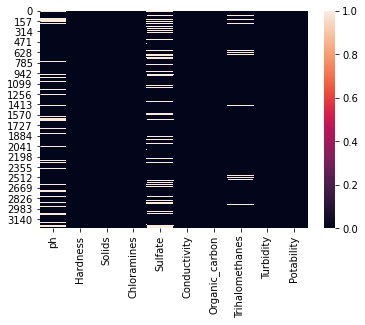

In [214]:
sns.heatmap(water_data.isnull())

In [215]:
## SKEWNESS CORRECTION
print(water_data.Potability.value_counts())
from sklearn.utils import resample

negative = water_data[water_data.Potability==0]
positive = water_data[water_data.Potability==1]
neg_sampled = resample(negative, replace=True, n_samples=len(positive))

downsampled = pd.concat([positive, neg_sampled])
print(downsampled.Potability.value_counts())
downsampled.reset_index(drop=True, inplace=True)
print(downsampled.head(20))
print(downsampled.Potability.value_counts())
print(downsampled.shape)

0    1998
1    1278
Name: Potability, dtype: int64
1    1278
0    1278
Name: Potability, dtype: int64
           ph    Hardness        Solids  ...  Trihalomethanes  Turbidity  Potability
0    9.445130  145.805402  13168.529156  ...        77.577460   3.875165           1
1    9.024845  128.096691  19859.676476  ...        73.778026   3.985251           1
2         NaN  169.974849  23403.637304  ...        50.861913   2.747313           1
3    6.800119  242.008082  39143.403329  ...        73.777275   3.854940           1
4    7.174135  203.408935  20401.102461  ...        74.405616   3.939896           1
5    7.657991  236.960889  14245.789121  ...        85.852769   2.437296           1
6    8.322987  207.252462  28049.646283  ...        60.911420   4.052136           1
7    5.934279  223.858125  23249.653834  ...        66.623944   5.217895           1
8    9.802721   98.771644  27357.456745  ...        59.454440   2.764634           1
9    6.101955  215.268090  15976.926225  ...    

In [216]:
def split_data(df):
    training_set, testing_set = train_test_split(df)
    tns = training_set.reset_index(drop=True)
    tts = testing_set.reset_index(drop=True)
    return tns, tts

In [217]:
train1, test1 = split_data(downsampled)

print(train1.shape)
print(test1.shape)

(1917, 10)
(639, 10)


training set 1 heatmap: 


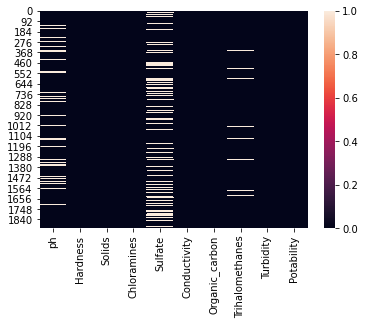

In [218]:
print("training set 1 heatmap: ")
p1 = sns.heatmap(train1.isnull())

testing set 1 heatmap: 


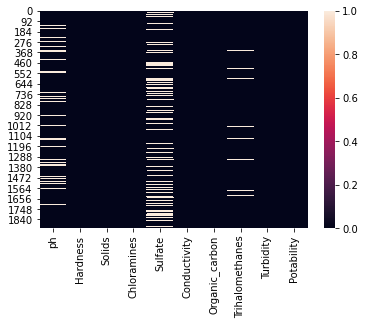

In [219]:
print("testing set 1 heatmap: ")
p2 = sns.heatmap(train1.isnull())

In [220]:
train2, test2 = split_data(downsampled)
print(train2.shape)
print(test2.shape)

test2.head()

(1917, 10)
(639, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.834260,182.454462,21670.569891,6.407648,325.950411,397.337508,16.506658,74.462646,2.658843,1
1,5.941266,179.954862,26562.447179,6.803288,NaN,431.969182,14.632401,75.434029,2.227371,0
2,NaN,252.404565,20197.247668,2.562255,350.547757,454.969812,12.031863,69.292252,5.146443,0
3,5.488314,135.802362,21485.153195,8.187416,280.603287,441.331137,14.860263,88.287346,5.066786,0
4,5.554437,229.122829,31344.460394,7.761431,NaN,306.872526,13.974800,87.273375,2.095914,0


In [221]:
def impute_missing_data(training_set, testing_set):
    train_s = impute_features(training_set)
    test_s = impute_features(testing_set)
    #print(train_s.head())
    #print(test_s.head())
    return (train_s, test_s)


def impute_features(input_dataset):
    dataset = input_dataset.copy()
    count = 0
    for i in dataset:
        no_na_column = dataset[i].dropna().values
        mean = sum(no_na_column) / len(no_na_column)
        na_map_list = list(dataset[i].isna().values)
        for b in range(len(na_map_list)):
            if na_map_list[b] == True:
                count +=1
                dataset.__getitem__(i).__setitem__(b, mean)
                #dataset.iloc[i][b] = mean
    return dataset.copy()



# def distance(row1, row2):
#     d = 0
#     for a, b in zip(row1, row2):
#         c = abs(a - b)
#         d += (c ** (1/2))
#     return np.sqrt(d)


# def predict(training_set, testing_set, k_nearest):
#     predictions = []
#     for i in tqdm(range(int(testing_set.shape[0]))):
#         recorded_vals = []
#         rowTest = testing_set.loc[i].values
#         for j in range(int(training_set.shape[0])):
#             rowTrain = training_set.iloc[j].values
#             dist = distance(rowTrain, rowTest)
#             val = rowTrain[-1]
#             recorded_vals += [(dist, val)]
#         topk_outcomes = [label for (dist, label) in sorted(recorded_vals)[:k_nearest]]
#         labels = set(topk_outcomes)
#         outcomes = []
#         for label in labels:
#             count = topk_outcomes.count(label)
#             outcomes += [(count, label)]
#         (_, outcome) = max(outcomes)
#         predictions += [outcome]
#     return predictions

# def compare(training_set, testing_set, k):
#     predicted = predict(training_set, testing_set, k)
#     actual = list(testing_set.iloc[:, -1].values)
#     comparison = pd.DataFrame(list(zip(predicted, actual)))
#     return (predicted, actual)

# def accuracy(predicted, actual):
#     correct = 0
#     for i in range(len(predicted)):
#         if predicted[i] == actual[i]:
#             correct += 1
#     return correct / len(predicted)

# def run_test(trnS, tstS, k, treatment=False):
#     if treatment:
#         (trnS, tstS) = impute_missing_data(trnS, tstS)
#     (pred, act) = compare(trnS, tstS, k)
#     acc = accuracy(pred, act)
#     return acc

In [222]:
# import matplotlib.pyplot as plt
# import multiprocessing
# from joblib import Parallel, delayed
# # import warnings
# # warnings.simplefilter(action='ignore', category=Warning)

# k_range = list(range(1,100,2))
# num_cores = multiprocessing.cpu_count()
# print(num_cores)

# def fun(k):
#   acc = run_test(train2, test2, k, True)
#   return acc

# executor = Parallel(n_jobs=num_cores, backend= 'multiprocessing')
# tasks = (delayed(fun)(i) for i in tqdm(k_range))
# acc_list = executor(tasks)

# plt.plot(k_range, acc_list)
# plt.xlabel('Value of k for KNN')
# plt.ylabel('Accuracy Score')
# plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
# plt.show()

In [223]:
# def printResults(acc_list, k_list):
# #     for k in range(len(acc_list)):
# #         print("For k = " + str(k_list[k]) + ",")
# #         print("accuracy = " + str(acc_list[k]))
#     print("MAX acc: " + str(max(acc_list)))
#     print("for K = " + str(k_list[acc_list.index(max(acc_list))]))
    
# printResults(acc_list, k_range)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


              precision    recall  f1-score   support

           0       0.50      0.62      0.56       308
           1       0.55      0.43      0.48       331

    accuracy                           0.52       639
   macro avg       0.53      0.53      0.52       639
weighted avg       0.53      0.52      0.52       639



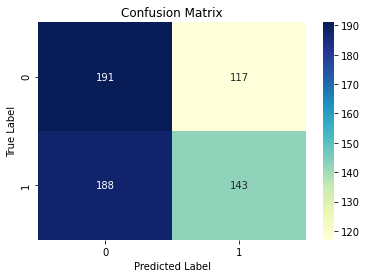

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = impute_features(downsampled)

inputs = X.drop('Potability', axis=1)
outputs = X['Potability']

X_train, X_test, y_train, y_test = train_test_split(inputs, outputs)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

print(classification_report(y_test, predictions))

# confusion_matrix(y_test, predictions)

ax = sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d", cmap='YlGnBu')
# ax.set(title = "KNN heatmap")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [225]:
# run_test(train1, test1, 1, True)
# run_test(train1, test1, 3, True)
# run_test(train1, test1, 5, True)
# run_test(train1, test1, 7, True)
# run_test(train1, test1, 9, True)
# run_test(train1, test1, 11, True)
# run_test(train2, test2, 13, True)
# run_test(train1, test1, 31, True)
# run_test(train1, test1, 33, True)